In [1]:
from tensorflow.keras.applications.inception_v3 import InceptionV3
from tensorflow.keras.applications.inception_v3 import decode_predictions
from keras.applications.inception_v3 import preprocess_input

In [7]:
#from keras.preprocessing import keras.utils as image
import keras.utils as image
import numpy as np
import matplotlib.pyplot as plt
import os
from os import listdir
from PIL import Image as PImage

In [3]:
#V3 input image will be 299x299x3
img_width, img_height = 299, 299 #VGG 224

In [4]:
# Inception is pre trained with Imagenet which is human annoted images with 1000 classes
model_pretrained = InceptionV3(weights='imagenet', 
                      include_top=True, 
                      input_shape=(img_height, img_width, 3))

96112376/96112376 [==============================] - 1s 0us/step


In [10]:
# Uploading image in google colab folder and using the path 
img_path= '/Whisky.jpg'
img = image.load_img(img_path, target_size=(img_width, img_height)) #changed the image to input dimesion image
img_data = image.img_to_array(img) # loaded image is converted int numpy array
img_data = np.expand_dims(img_data, axis=0) # changed to 4 dimesion 
img_data = preprocess_input(img_data)
# image is preprocessed

35363/35363 [==============================] - 0s 0us/step


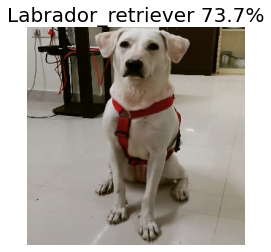

In [11]:
#predict the result
# verbose=0 will show you nothing (silent), verbose=1 will show you an animated progress bar like this:
cnn_feature = model_pretrained.predict(img_data,verbose=0) # pass preprocessed image. 
# decode the results into a list of tuples (class, description, probability)
label = decode_predictions(cnn_feature) # Decodes the prediction of an ImageNet model.
label = label[0][0]
#label: get the 0th index which has 1st prediction which is highly matched

plt.imshow(img) # show picture

stringprint ="%.1f" % round(label[2]*100,1)
plt.title(label[1] + " " + str(stringprint) + "%", fontsize=20)
plt.axis('off')
plt.show()

#Whisky's (my dog) picture is not only classified as dog, her picture is clasified as labrador retriver
# It is 73.7% match as she is lab and Indie mix breed. 

In [12]:
# checking top 3 predictions
print('Predicted:', decode_predictions(cnn_feature, top=3)[0]) # 4rd prediction is golden retriver

Predicted: [('n02099712', 'Labrador_retriever', 0.7373175), ('n02104029', 'kuvasz', 0.03801313), ('n02099601', 'golden_retriever', 0.015368496)]


In [13]:
label

('n02099712', 'Labrador_retriever', 0.7373175)

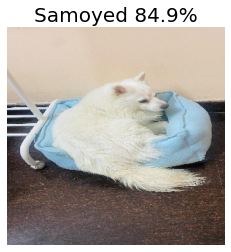

In [14]:
img_path = '/coco.jpeg'
img = image.load_img(img_path, target_size=(img_width, img_height))
img_data = image.img_to_array(img)
img_data = np.expand_dims(img_data, axis=0)
img_data = preprocess_input(img_data)

#predict the result
cnn_feature = model_pretrained.predict(img_data,verbose=0)
# decode the results into a list of tuples (class, description, probability)
label = decode_predictions(cnn_feature)
label = label[0][0]


plt.imshow(img)

stringprint ="%.1f" % round(label[2]*100,1)
plt.title(label[1] + " " + str(stringprint) + "%", fontsize=20)
plt.axis('off')
plt.show()

# I have uploaded my other dog's picture Coco. who is Indian Spitz, he looks like Samoyed breed in this particular picture.
 #my model has classified him as samoyed
# 2nd prediction is pom (which is closer to actual ouput) and 3rd is white wolf. 


In [15]:
print('Predicted:', decode_predictions(cnn_feature, top=3)[0])

Predicted: [('n02111889', 'Samoyed', 0.8491108), ('n02112018', 'Pomeranian', 0.020583943), ('n02114548', 'white_wolf', 0.005905424)]


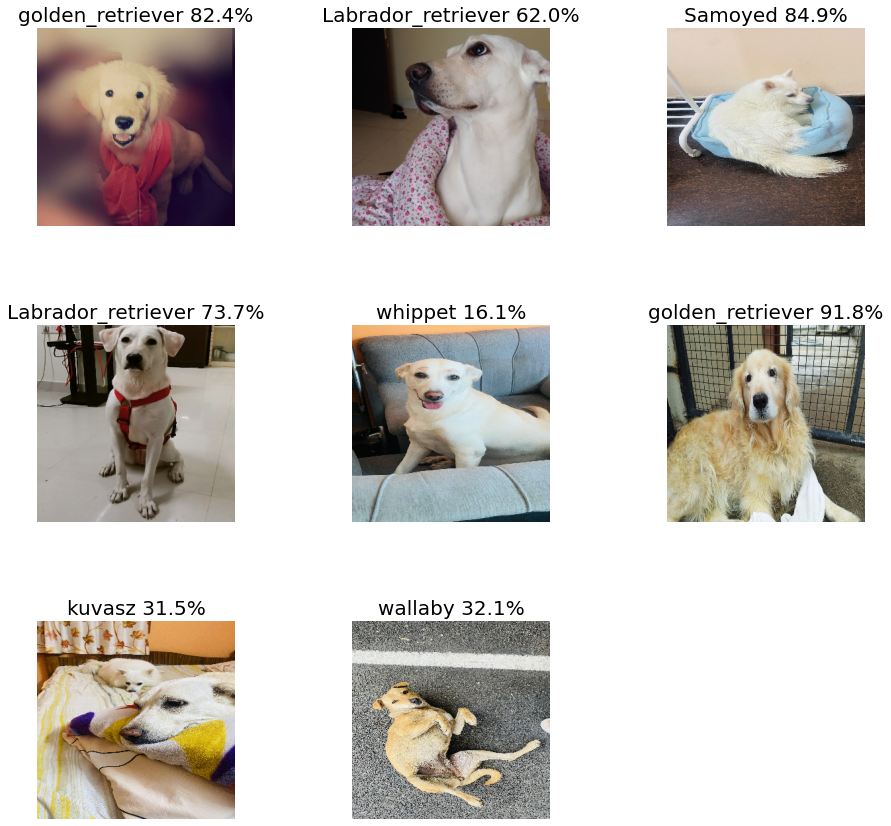

In [18]:
# to predict set of image (multiple images) 
#upload images using 3 dot and then provide link 
folder_path = '/content/sample_data/pictures/'
images = os.listdir(folder_path)
fig = plt.figure(figsize=(16,20))
i=0
rows=4
columns=3

for image1 in images:
    i+=1
    img = image.load_img(folder_path+image1, target_size=(img_width, img_height))
    img_data = image.img_to_array(img)
    img_data = np.expand_dims(img_data, axis=0)
    img_data = preprocess_input(img_data)

    cnn_feature = model_pretrained.predict(img_data,verbose=0)
    label = decode_predictions(cnn_feature)
    label = label[0][0]
    
    fig.add_subplot(rows,columns,i)
    fig.subplots_adjust(hspace=.5)

    plt.imshow(img)
    stringprint ="%.1f" % round(label[2]*100,1)
    plt.title(label[1] + " " + str(stringprint) + "%", fontsize=20)
    plt.axis('off')
plt.show()

# whisky is also classfied as whippet as in that picture her ears are back and whppet's ears are more like that
# more like dobby in Harry Potter